In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
import string, nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import punkt

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
path = "/content/drive/MyDrive/fake reviews dataset.csv"

In [ ]:
df = pd.read_csv(path)
df.head()

category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...

In [ ]:
df.drop(df[['category','rating']],axis=1,inplace=True)

In [ ]:
df.head()

label                                              text_
0    CG  Love this!  Well made, sturdy, and very comfor...
1    CG  love it, a great upgrade from the original.  I...
2    CG  This pillow saved my back. I love the look and...
3    CG  Missing information on how to use it, but it i...
4    CG  Very nice set. Good quality. We have had the s...

In [ ]:
df['label'].value_counts()

CG    20216
OR    20216
Name: label, dtype: int64

In [ ]:
df['label']=np.where(df['label']=="CG",'FAKE REVIEW','ORIGINAL REVIEW')

In [ ]:
df.head()

label                                              text_
0  FAKE REVIEW  Love this!  Well made, sturdy, and very comfor...
1  FAKE REVIEW  love it, a great upgrade from the original.  I...
2  FAKE REVIEW  This pillow saved my back. I love the look and...
3  FAKE REVIEW  Missing information on how to use it, but it i...
4  FAKE REVIEW  Very nice set. Good quality. We have had the s...

In [ ]:
df.shape

(40432, 2)

In [ ]:
df.isnull().sum()

label    0
text_    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   40432 non-null  object
 1   text_   40432 non-null  object
dtypes: object(2)
memory usage: 631.9+ KB


In [ ]:
df.describe()

label                                              text_
count         40432                                              40432
unique            2                                              40412
top     FAKE REVIEW  Easy to put together and looks nice and the fi...
freq          20216                                                  2

In [ ]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [ ]:
df['text_'].head()

0    Love this!  Well made, sturdy, and very comfor...
1    love it, a great upgrade from the original.  I...
2    This pillow saved my back. I love the look and...
3    Missing information on how to use it, but it i...
4    Very nice set. Good quality. We have had the s...
Name: text_, dtype: object

In [ ]:
clean_text(df['text_'])

'Love this! Well made, sturdy, comfortable. love it!Very prettylove it, great upgrade original. I\'ve mine couple yearsThis pillow saved back. love look feel pillow.Missing information use it, great product price! IVery nice set. Good quality. set two months beenI WANTED DIFFERENT FLAVORS NOT.They perfect touch thing wish little space.These done fit well look great. love smoothness edges extraGreat big numbers & easy read, thing like size theMy son loves comforter well made. also babyAs advertised. 5th one I\'ve had. problem really aVery handy one kids tools included package. one inDid someone say, "Oriental $60"? great product theThese flimsy! quality would expect piece furniture.Makes may tea stirring. problem kind hard putAbsolutely adorable! excellent price. wooden ones months theyLove this! Perfect size entire family!Very good quality.These look beautiful nice. problem really mesh one.Exactly would expect. love look feel pillow.10 Stars, would highly recommend item. love blanket.G

In [ ]:
df["text_"]=df["text_"].astype(str)

In [ ]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit()])

In [ ]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)
df['text_'] = df['text_'].str.lower()


In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

In [ ]:
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [ ]:
df['text_'].head()

0    love ! well made , sturdi , comfort . i love !...
1    love , great upgrad origin . i 've mine coupl ...
2     thi pillow save back . i love look feel pillow .
3            miss inform use , great product price ! i
4      veri nice set . good qualiti . we set two month
Name: text_, dtype: object

In [ ]:
df.head()

label                                              text_
0  FAKE REVIEW  love ! well made , sturdi , comfort . i love !...
1  FAKE REVIEW  love , great upgrad origin . i 've mine coupl ...
2  FAKE REVIEW   thi pillow save back . i love look feel pillow .
3  FAKE REVIEW          miss inform use , great product price ! i
4  FAKE REVIEW    veri nice set . good qualiti . we set two month

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['length'] = df['text_'].apply(len)

In [ ]:
df.head()

label                                              text_  length
0  FAKE REVIEW  love ! well made , sturdi , comfort . i love !...      58
1  FAKE REVIEW  love , great upgrad origin . i 've mine coupl ...      50
2  FAKE REVIEW   thi pillow save back . i love look feel pillow .      48
3  FAKE REVIEW          miss inform use , great product price ! i      41
4  FAKE REVIEW    veri nice set . good qualiti . we set two month      47

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   40432 non-null  object
 1   text_   40432 non-null  object
 2   length  40432 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 947.8+ KB


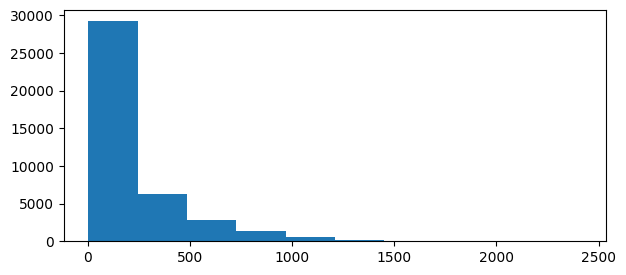

In [ ]:
plt.figure(figsize=(7,3))
plt.hist(df['length'],bins=10)
plt.show()



In [ ]:
df.groupby('label').describe()

length                                                   \
                   count        mean         std  min   25%    50%    75%   
label                                                                       
FAKE REVIEW      20216.0  186.619806  186.922302  3.0  61.0  107.0  232.0   
ORIGINAL REVIEW  20216.0  255.165512  270.920672  8.0  80.0  144.0  317.0   

                         
                    max  
label                    
FAKE REVIEW      1399.0  
ORIGINAL REVIEW  2416.0

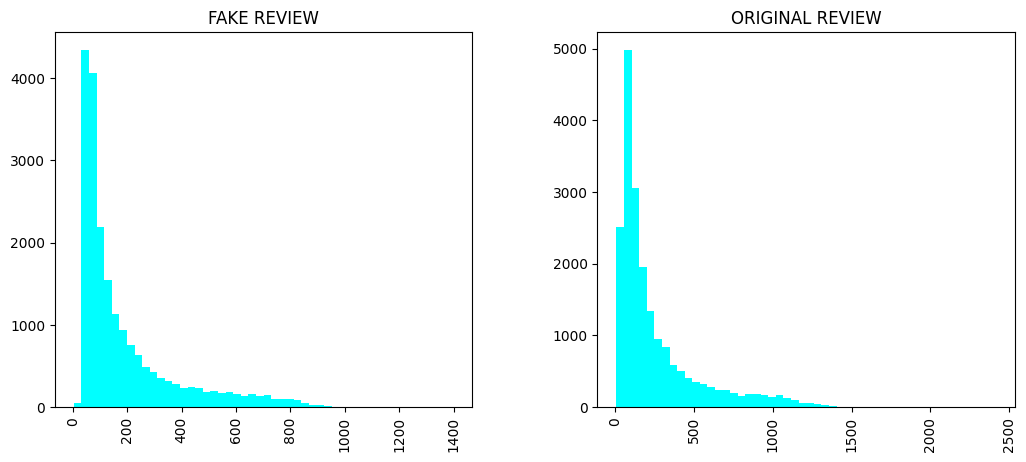

In [ ]:
df.hist(column='length',by='label',bins=50,color='cyan',figsize=(12,5))
plt.show()

In [ ]:
df[df['label']=='ORIGINAL REVIEW'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"i thought i 'd purchas item ( also & nbsp ; < data-hook= '' product-link-link '' class= '' a-link-norm '' href= '' /kidco-door-knob-locks-clear-2-pack/dp/b0010cd2io/ref=cm_cr_arp_d_rvw_txt ? ie=utf8 '' > kidco door knob lock clear pack < /a > & nbsp ; & nbsp ; < data-hook= '' product-link-link '' class= '' a-link-norm '' href= '' /door-knob-lock/dp/b00238meqa/ref=cm_cr_arp_d_rvw_txt ? ie=utf8 '' > door knob lock < /a > , white color & nbsp ; < data-hook= '' product-link-link '' class= '' a-link-norm '' href= '' /kidco-door-knob-lock-colors-white/dp/b001j2wjf2/ref=cm_cr_arp_d_rvw_txt ? ie=utf8 '' > kidco door knob lock color : white < /a > & nbsp ; & nbsp ; < data-hook= '' product-link-link '' class= '' a-link-norm '' href= '' /door-knob-lock-2-pack/dp/b00069bvgm/ref=cm_cr_arp_d_rvw_txt ? ie=utf8 '' > door knob lock - pack < /a > ) & nbsp ; < data-hook= '' product-link-link '' class= '' a-link-norm '' href= '' /secure-grip-clear-door-knob-covers-3-pack/dp/b00068xbxe/ref=cm_cr_arp_d_rvw

In [ ]:
df['length'].describe()

count    40432.000000
mean       220.892659
std        235.249435
min          3.000000
25%         69.000000
50%        125.000000
75%        271.000000
max       2416.000000
Name: length, dtype: float64

In [ ]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
bow = CountVectorizer(analyzer=text_process)
bow

CountVectorizer(analyzer=<function text_process at 0x7f2dc159a050>)

In [ ]:
bow.fit(df['text_'])

CountVectorizer(analyzer=<function text_process at 0x7f2dc159a050>)

In [ ]:
print('Total Vocabulary : ',len(bow.vocabulary_))

Total Vocabulary :  34450


In [ ]:
review = df['text_'][3]
review

'miss inform use , great product price ! i'

In [ ]:
bow_msg = bow.transform([review])
print(bow_msg)
print(bow_msg.shape)

  (0, 13598)	1
  (0, 15840)	1
  (0, 19848)	1
  (0, 23847)	1
  (0, 23977)	1
  (0, 32182)	1
(1, 34450)


In [ ]:
print(bow.get_feature_names_out()[19848])

miss


In [ ]:
bow_reviews = bow.transform(df['text_'])

In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg)
print(bow_msg)

  (0, 13598)	1
  (0, 15840)	1
  (0, 19848)	1
  (0, 23847)	1
  (0, 23977)	1
  (0, 32182)	1


In [ ]:
print(tfidf_transformer.idf_[bow.vocabulary_['vietnam']])

8.774188218150751


In [ ]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)

Shape: (40432, 34450)


In [ ]:
x=df['text_']
y=df['label']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df['text_'],df['label'],stratify=y,test_size=0.2)

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())])

In [ ]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f2dc159a050>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predict = pipeline.predict(x_test)

In [ ]:
predict

array(['FAKE REVIEW', 'FAKE REVIEW', 'FAKE REVIEW', ...,
       'ORIGINAL REVIEW', 'ORIGINAL REVIEW', 'ORIGINAL REVIEW'],
      dtype='<U15')

In [ ]:
y_test

8491         FAKE REVIEW
14035        FAKE REVIEW
2233         FAKE REVIEW
28426        FAKE REVIEW
10984    ORIGINAL REVIEW
              ...       
30292        FAKE REVIEW
109      ORIGINAL REVIEW
22598    ORIGINAL REVIEW
1717         FAKE REVIEW
2223     ORIGINAL REVIEW
Name: label, Length: 8087, dtype: object

In [ ]:
print('Classification Report:',classification_report(y_test,predict))
print('Confusion Matrix:',confusion_matrix(y_test,predict))
print('Accuracy Score:',accuracy_score(y_test,predict))

Classification Report:                  precision    recall  f1-score   support

    FAKE REVIEW       0.83      0.88      0.85      4043
ORIGINAL REVIEW       0.87      0.82      0.84      4044

       accuracy                           0.85      8087
      macro avg       0.85      0.85      0.85      8087
   weighted avg       0.85      0.85      0.85      8087

Confusion Matrix: [[3561  482]
 [ 734 3310]]
Accuracy Score: 0.8496352170149623


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())])

In [ ]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f2dc159a050>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
rfc_pred = pipeline.predict(x_test)
rfc_pred

array(['FAKE REVIEW', 'FAKE REVIEW', 'FAKE REVIEW', ...,
       'ORIGINAL REVIEW', 'FAKE REVIEW', 'FAKE REVIEW'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(y_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(y_test,rfc_pred))
print('Accuracy Score:',accuracy_score(y_test,rfc_pred))

Classification Report:                  precision    recall  f1-score   support

    FAKE REVIEW       0.83      0.88      0.85      4043
ORIGINAL REVIEW       0.87      0.82      0.84      4044

       accuracy                           0.85      8087
      macro avg       0.85      0.85      0.85      8087
   weighted avg       0.85      0.85      0.85      8087

Confusion Matrix: [[3561  482]
 [ 734 3310]]
Accuracy Score: 0.8496352170149623


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [ ]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f2dc159a050>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
dtree_pred = pipeline.predict(x_test)
dtree_pred

array(['FAKE REVIEW', 'FAKE REVIEW', 'FAKE REVIEW', ...,
       'ORIGINAL REVIEW', 'FAKE REVIEW', 'FAKE REVIEW'], dtype=object)

In [ ]:
print('Classification Report:',classification_report(y_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(y_test,dtree_pred))
print('Accuracy Score:',accuracy_score(y_test,dtree_pred))

Classification Report:                  precision    recall  f1-score   support

    FAKE REVIEW       0.83      0.88      0.85      4043
ORIGINAL REVIEW       0.87      0.82      0.84      4044

       accuracy                           0.85      8087
      macro avg       0.85      0.85      0.85      8087
   weighted avg       0.85      0.85      0.85      8087

Confusion Matrix: [[3561  482]
 [ 734 3310]]
Accuracy Score: 0.8496352170149623


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [ ]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f2dc159a050>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [ ]:
lr_pred = pipeline.predict(x_test)
lr_pred

array(['FAKE REVIEW', 'FAKE REVIEW', 'FAKE REVIEW', ...,
       'ORIGINAL REVIEW', 'ORIGINAL REVIEW', 'ORIGINAL REVIEW'],
      dtype=object)

In [ ]:
print('Classification Report:',classification_report(y_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(y_test,lr_pred))
print('Accuracy Score:',accuracy_score(y_test,lr_pred))

Classification Report:                  precision    recall  f1-score   support

    FAKE REVIEW       0.88      0.85      0.86      4043
ORIGINAL REVIEW       0.85      0.88      0.87      4044

       accuracy                           0.86      8087
      macro avg       0.86      0.86      0.86      8087
   weighted avg       0.86      0.86      0.86      8087

Confusion Matrix: [[3435  608]
 [ 490 3554]]
Accuracy Score: 0.8642265364164708
